### Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Tentukan path file di Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Tugas Akhir Fidel RFM/DATASET PT. SSM NEW 2023.csv'

# Membaca dataset
# Specify the encoding as 'latin-1' to handle the problematic byte.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tugas Akhir Fidel RFM/DATASET PT. SSM NEW 2023.csv', sep=';', encoding='latin-1')
# Menampilkan 5 baris pertama dataset
df.head()

,ï»¿NAMACUSTOMER,KOTACUSTOMER,NOFAKTUR,TGL,KODEBARANG,NAMABARANG,QTY,HARGAJUAL,NETTO
0,JEMPOL NUSUKAN,SURAKARTA,202301001,2023-01-02,150221,CAVIS MERAH N3,2,"524.079,28","1.048.158,56"
1,JEMPOL NUSUKAN,SURAKARTA,202301001,2023-01-02,150221,CAVIS MERAH N3,4,"524.079,28","2.096.317,12"
2,CV. MAXIMO SENTOSA ABADI,KOTA SEMARANG,202301002,2023-01-02,220112,YAMATO NPC HITAM,10,"315.315,0","3.153.150,0"
3,YUDHA PUTRA RAHARJA,SEMARANG,202301003,2023-01-02,151139,AYUMI CHAIR NO.6,100,"334.234,0","33.423.400,0"
4,YUDHA PUTRA RAHARJA,SEMARANG,202301003,2023-01-02,151137,AYUMI DESK NO.6,100,"488.739,0","48.873.900,0"


In [ ]:
# Untuk mengubah nama beberapa kolom
df.rename(columns={'ï»¿NAMACUSTOMER': 'NAMACUSTOMER', ' QTY ': 'QTY'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3155 entries, 0 to 3154
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NAMACUSTOMER  3149 non-null   object
 1   KOTACUSTOMER  3008 non-null   object
 2   NOFAKTUR      3149 non-null   object
 3   TGL           3149 non-null   object
 4   KODEBARANG    3149 non-null   object
 5   NAMABARANG    3149 non-null   object
 6   QTY           3150 non-null   object
 7   HARGAJUAL     3149 non-null   object
 8   NETTO         3150 non-null   object
dtypes: object(9)
memory usage: 222.0+ KB


###Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tugas Akhir Fidel RFM/DATASET PT. SSM NEW 2023.csv',
                 encoding="utf-8",
                 sep=';', # secara eksplisit tetapkan delimiter
                 on_bad_lines='skip') # lewati baris dengan error

In [ ]:
print(df.info())  # Menampilkan tipe data setiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3155 entries, 0 to 3154
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NAMACUSTOMER  3149 non-null   object
 1   KOTACUSTOMER  3008 non-null   object
 2   NOFAKTUR      3149 non-null   object
 3   TGL           3149 non-null   object
 4   KODEBARANG    3149 non-null   object
 5   NAMABARANG    3149 non-null   object
 6    QTY          3150 non-null   object
 7   HARGAJUAL     3149 non-null   object
 8   NETTO         3150 non-null   object
dtypes: object(9)
memory usage: 222.0+ KB
None


In [ ]:
df.rename(columns={' QTY ': 'QTY'}, inplace=True)

### Cek Missing Value

In [ ]:
# Menghitung total missing value di seluruh DataFrame
df.isnull().sum().sum()

np.int64(193)

In [ ]:
# Menghitung jumlah missing value di setiap kolom
df.isnull().sum()

,0
NAMACUSTOMER,6
KOTACUSTOMER,147
NOFAKTUR,6
TGL,6
KODEBARANG,6
NAMABARANG,6
QTY,5
HARGAJUAL,6
NETTO,5


#### Menangani missing value dengan modus

In [ ]:
import pandas as pd

#Nama Customer
df['NAMACUSTOMER'].fillna('Tidak Diketahui', inplace=True)

#Kota Customer
df['KOTACUSTOMER'].fillna(df['KOTACUSTOMER'].mode()[0], inplace=True)

#No Faktur, TGL, Kode Barang, Nama Barang, Harga Jual
df.dropna(subset=['NOFAKTUR', 'TGL', 'KODEBARANG', 'NAMABARANG', 'HARGAJUAL'], inplace=True)

#QTY, Netto
# Pastikan kolom QTY dan NETTO bertipe numerik sebelum imputasi
df['QTY'] = pd.to_numeric(df['QTY'], errors='coerce')

# Imputasi dengan median
df['QTY'].fillna(df['QTY'].median(), inplace=True)


<ipython-input-11-b14c2003b058>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NAMACUSTOMER'].fillna('Tidak Diketahui', inplace=True)
<ipython-input-11-b14c2003b058>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

1. Hapus baris dengan missing value pada NOFAKTUR, TGL, KODEBARANG, 2. NAMABARANG, HARGAJUAL.
3. Imputasi NAMACUSTOMER dengan "Tidak Diketahui".
4. Imputasi KOTACUSTOMER dengan modus.
5. Konversi QTY dan NETTO ke numerik dan imputasi dengan median.

In [ ]:
df.head(100)

,NAMACUSTOMER,KOTACUSTOMER,NOFAKTUR,TGL,KODEBARANG,NAMABARANG,QTY,HARGAJUAL,NETTO
0,JEMPOL NUSUKAN,SURAKARTA,202301001,2023-01-02,150221,CAVIS MERAH N3,2.0,"524.079,28","1.048.158,56"
1,JEMPOL NUSUKAN,SURAKARTA,202301001,2023-01-02,150221,CAVIS MERAH N3,4.0,"524.079,28","2.096.317,12"
2,CV. MAXIMO SENTOSA ABADI,KOTA SEMARANG,202301002,2023-01-02,220112,YAMATO NPC HITAM,10.0,"315.315,0","3.153.150,0"
3,YUDHA PUTRA RAHARJA,SEMARANG,202301003,2023-01-02,151139,AYUMI CHAIR NO.6,100.0,"334.234,0","33.423.400,0"
4,YUDHA PUTRA RAHARJA,SEMARANG,202301003,2023-01-02,151137,AYUMI DESK NO.6,100.0,"488.739,0","48.873.900,0"
...,...,...,...,...,...,...,...,...,...
95,PT. BUKIT INTI MAKMUR ABADI,KAB. SIDOARJO,202301057,2023-01-04,150128,CAESAR N BIRU L1,12.0,"459.099,10","5.509.189,19"
96,BAPAK MUKHLIS,SEMARANG,202301058,2023-01-04,150128,CAESAR N BIRU L1,10.0,"491.891,89","4.918.918,92"
97,BAPAK REMON,SEMARANG,202301059,2023-01-04,150003,YAMATO NN BIRU,2.0,"162.162,16","324.324,32"
98,BAPAK JUM,SEMARANG,202301060,2023-01-04,150133,CAESAR N HIJAU L6,1.0,"131.171,17","131.171,17"


#### Mengkonversi TGL ke datetime

In [ ]:
df['TGL'] = pd.to_datetime(df['TGL'], errors='coerce')


In [ ]:
print(df['TGL'].unique())


<DatetimeArray>
['2023-01-02 00:00:00', '2023-01-03 00:00:00', '2023-01-04 00:00:00',
 '2023-01-05 00:00:00', '2023-01-06 00:00:00', '2023-01-07 00:00:00',
 '2023-01-09 00:00:00', '2023-01-10 00:00:00', '2023-01-11 00:00:00',
 '2023-01-12 00:00:00',
 ...
 '2023-12-18 00:00:00', '2023-12-19 00:00:00', '2023-12-20 00:00:00',
 '2023-12-21 00:00:00', '2023-12-22 00:00:00', '2023-12-23 00:00:00',
 '2023-12-26 00:00:00', '2023-12-27 00:00:00', '2023-12-28 00:00:00',
 '2023-12-29 00:00:00']
Length: 284, dtype: datetime64[ns]


In [ ]:
df['TGL'] = pd.to_datetime(df['TGL'], format='%d/%m/%Y', errors='coerce')


In [ ]:
df.head()

,NAMACUSTOMER,KOTACUSTOMER,NOFAKTUR,TGL,KODEBARANG,NAMABARANG,QTY,HARGAJUAL,NETTO
0,JEMPOL NUSUKAN,SURAKARTA,202301001,2023-01-02,150221,CAVIS MERAH N3,2.0,"524.079,28","1.048.158,56"
1,JEMPOL NUSUKAN,SURAKARTA,202301001,2023-01-02,150221,CAVIS MERAH N3,4.0,"524.079,28","2.096.317,12"
2,CV. MAXIMO SENTOSA ABADI,KOTA SEMARANG,202301002,2023-01-02,220112,YAMATO NPC HITAM,10.0,"315.315,0","3.153.150,0"
3,YUDHA PUTRA RAHARJA,SEMARANG,202301003,2023-01-02,151139,AYUMI CHAIR NO.6,100.0,"334.234,0","33.423.400,0"
4,YUDHA PUTRA RAHARJA,SEMARANG,202301003,2023-01-02,151137,AYUMI DESK NO.6,100.0,"488.739,0","48.873.900,0"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3148
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   NAMACUSTOMER  3149 non-null   object        
 1   KOTACUSTOMER  3149 non-null   object        
 2   NOFAKTUR      3149 non-null   object        
 3   TGL           3149 non-null   datetime64[ns]
 4   KODEBARANG    3149 non-null   object        
 5   NAMABARANG    3149 non-null   object        
 6   QTY           3149 non-null   float64       
 7   HARGAJUAL     3149 non-null   object        
 8   NETTO         3149 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 310.6+ KB


In [ ]:
df['NETTO'] = df['NETTO'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3148
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   NAMACUSTOMER  3149 non-null   object        
 1   KOTACUSTOMER  3149 non-null   object        
 2   NOFAKTUR      3149 non-null   object        
 3   TGL           3149 non-null   datetime64[ns]
 4   KODEBARANG    3149 non-null   object        
 5   NAMABARANG    3149 non-null   object        
 6   QTY           3149 non-null   float64       
 7   HARGAJUAL     3149 non-null   object        
 8   NETTO         3149 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 310.6+ KB


In [ ]:
print(df['NETTO'].head())


0     1048158.56
1     2096317.12
2     3153150.00
3    33423400.00
4    48873900.00
Name: NETTO, dtype: float64


In [ ]:
# Simpan dataset yang sudah diubah
df.to_csv('dataset_rfm_mentah.csv', index=False, encoding='latin-1')  # Ganti 'dataset_terbaru.csv' dengan nama file yang diinginkan

### Menghtung RFM

In [ ]:
# Definisikan latest_date
latest_date = df['TGL'].max()

# Hitung RFM
rfm = df.groupby('NAMACUSTOMER').agg({
    'TGL': lambda x: (latest_date - x.max()).days,  # Recency (hari sejak transaksi terakhir)
    'NOFAKTUR': 'nunique',  # Frequency (jumlah transaksi unik)
    'NETTO': 'sum'  # Monetary (total belanja)
})

# Ubah nama kolom
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.reset_index(inplace=True)

In [ ]:
print(rfm.head())

                             NAMACUSTOMER  Recency  Frequency      Monetary
0                             ACHMAD SAID       51          7  8.861216e+07
1  ADI UPAYA/POLTEKKES TNI AU ADISUTJIPTO       95          1  9.334595e+07
2                               ALFA LINK      220          2  1.231243e+07
3                              ANIK MEBEL      122          5  2.320670e+08
4                         ANTONIUS JEKSON       76          6  1.361892e+06


#### Cek Kembali Missing Value setelah perhitungan

In [ ]:
print(rfm.describe())

          Recency   Frequency      Monetary
count  593.000000  593.000000  5.930000e+02
mean   163.900506    2.922428  7.899540e+07
std    110.437147    7.521190  3.290784e+08
min      0.000000    1.000000  1.801802e+04
25%     62.000000    1.000000  1.315315e+06
50%    151.000000    1.000000  7.244685e+06
75%    255.000000    2.000000  3.769216e+07
max    361.000000  127.000000  5.660423e+09


### Normalisasi Data

#### Normalisasi data dengan StandardScaler


In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


### Menentukan jumlah cluster optimal

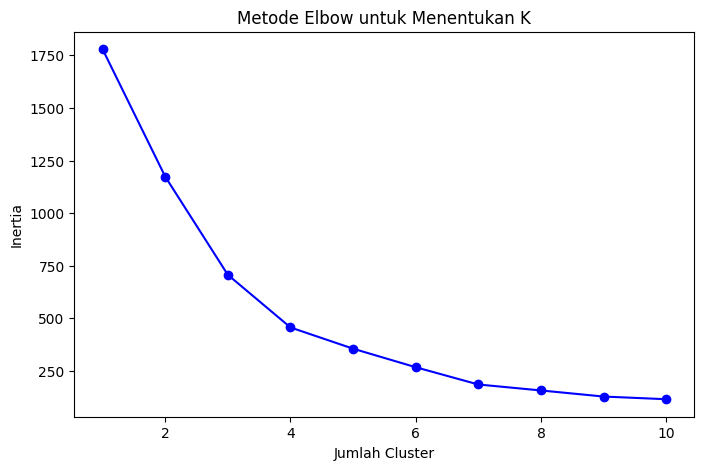

In [ ]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Pastikan dataset sudah benar sebelum scaling
print(rfm.describe())  # Sebelum scaling

# Scaling data RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Cek hasil setelah scaling
import numpy as np
print("Mean setelah scaling:", np.mean(rfm_scaled, axis=0))
print("Std dev setelah scaling:", np.std(rfm_scaled, axis=0))


          Recency   Frequency      Monetary
count  593.000000  593.000000  5.930000e+02
mean   163.900506    2.922428  7.899540e+07
std    110.437147    7.521190  3.290784e+08
min      0.000000    1.000000  1.801802e+04
25%     62.000000    1.000000  1.315315e+06
50%    151.000000    1.000000  7.244685e+06
75%    255.000000    2.000000  3.769216e+07
max    361.000000  127.000000  5.660423e+09
Mean setelah scaling: [ 6.59019401e-17 -5.99108546e-18 -2.99554273e-18]
Std dev setelah scaling: [1. 1. 1.]


In [ ]:
from sklearn.cluster import KMeans

# Misal kita pilih K=4
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Lihat jumlah anggota di tiap cluster
print(rfm['Cluster'].value_counts())


Cluster
0    331
1    260
2      1
3      1
Name: count, dtype: int64


In [ ]:
import numpy as np
rfm['Monetary'] = np.log1p(rfm['Monetary'])  # Transformasi untuk Monetary
rfm['Frequency'] = np.log1p(rfm['Frequency'])  # Transformasi untuk Frequency


In [ ]:
from sklearn.preprocessing import StandardScaler

# Pastikan dataset sudah benar sebelum scaling
print(rfm.describe())  # Sebelum scaling

# Scaling data RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Cek hasil setelah scaling
import numpy as np
print("Mean setelah scaling:", np.mean(rfm_scaled, axis=0))
print("Std dev setelah scaling:", np.std(rfm_scaled, axis=0))

          Recency   Frequency    Monetary     Cluster
count  593.000000  593.000000  593.000000  593.000000
mean   163.900506    0.999121   15.839348    0.446880
std    110.437147    0.624883    2.247036    0.510989
min      0.000000    0.693147    9.799183    0.000000
25%     62.000000    0.693147   14.089588    0.000000
50%    151.000000    0.693147   15.795779    0.000000
75%    255.000000    1.098612   17.444963    1.000000
max    361.000000    4.852030   22.456764    3.000000
Mean setelah scaling: [ 6.59019401e-17 -7.78841110e-17  5.03251179e-16]
Std dev setelah scaling: [1. 1. 1.]


In [ ]:
print(rfm['Cluster'].value_counts())


Cluster
0    331
1    260
2      1
3      1
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import silhouette_score

# Gunakan rfm_scaled dan rfm['Cluster'] sebagai ganti X_scaled dan labels
silhouette_avg = silhouette_score(rfm_scaled, rfm['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2727823509244888


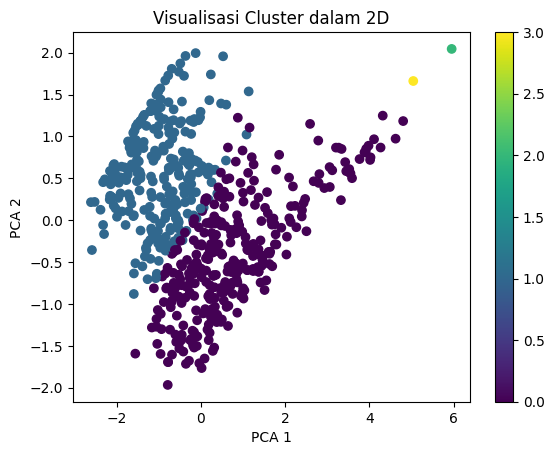

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=rfm['Cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Cluster dalam 2D')
plt.colorbar()
plt.show()


### K-Means

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [ ]:
import pandas as pd

# Hitung jumlah pelanggan di setiap cluster
cluster_counts = pd.DataFrame(rfm['Cluster'].value_counts()).reset_index()
cluster_counts.columns = ['Cluster', 'Jumlah Pelanggan']
print(cluster_counts)

   Cluster  Jumlah Pelanggan
0        2               283
1        1               264
2        0                46


In [ ]:
print(rfm['Cluster'].value_counts())


Cluster
2    283
1    264
0     46
Name: count, dtype: int64


#### Cek distribusi rfm

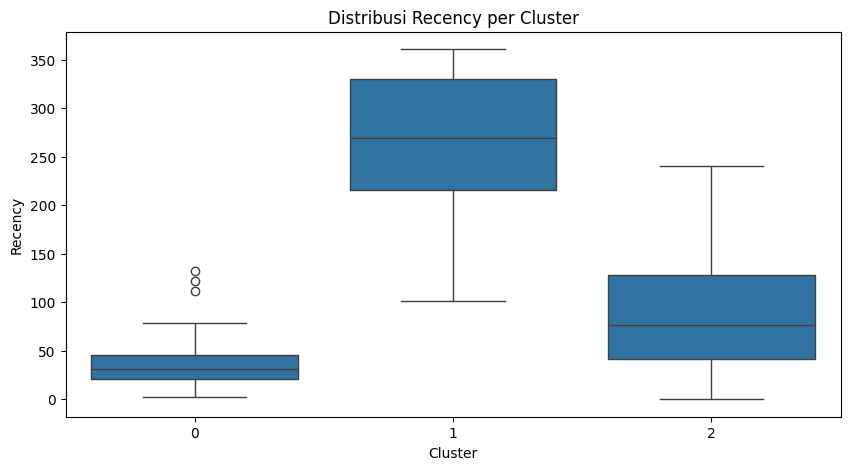

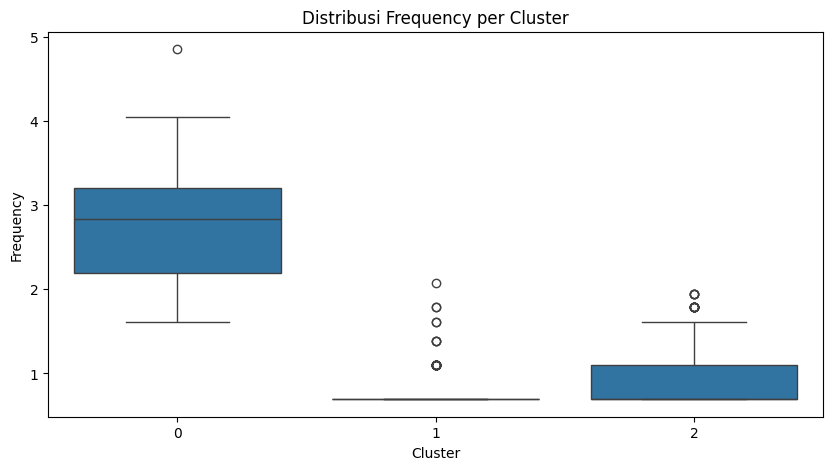

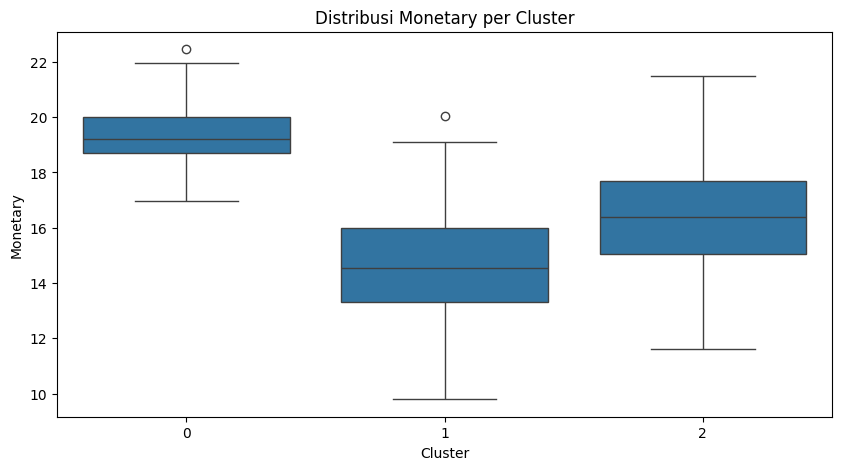

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot Recency
plt.figure(figsize=(10,5))
sns.boxplot(x="Cluster", y="Recency", data=rfm)
plt.title("Distribusi Recency per Cluster")
plt.show()

# Boxplot Frequency
plt.figure(figsize=(10,5))
sns.boxplot(x="Cluster", y="Frequency", data=rfm)
plt.title("Distribusi Frequency per Cluster")
plt.show()

# Boxplot Monetary
plt.figure(figsize=(10,5))
sns.boxplot(x="Cluster", y="Monetary", data=rfm)
plt.title("Distribusi Monetary per Cluster")
plt.show()


In [ ]:
rfm['Cluster'].value_counts(normalize=True) * 100


,proportion
Cluster,
2,47.723440
1,44.519393
0,7.757167


In [ ]:
df.head()

,NAMACUSTOMER,KOTACUSTOMER,NOFAKTUR,TGL,KODEBARANG,NAMABARANG,QTY,HARGAJUAL,NETTO
0,JEMPOL NUSUKAN,SURAKARTA,202301001,2023-01-02,150221,CAVIS MERAH N3,2.0,"524.079,28",1048158.56
1,JEMPOL NUSUKAN,SURAKARTA,202301001,2023-01-02,150221,CAVIS MERAH N3,4.0,"524.079,28",2096317.12
2,CV. MAXIMO SENTOSA ABADI,KOTA SEMARANG,202301002,2023-01-02,220112,YAMATO NPC HITAM,10.0,"315.315,0",3153150.00
3,YUDHA PUTRA RAHARJA,SEMARANG,202301003,2023-01-02,151139,AYUMI CHAIR NO.6,100.0,"334.234,0",33423400.00
4,YUDHA PUTRA RAHARJA,SEMARANG,202301003,2023-01-02,151137,AYUMI DESK NO.6,100.0,"488.739,0",48873900.00


In [ ]:
rfm.set_index('NAMACUSTOMER', inplace=True)


In [ ]:
print(rfm.head())  # Menampilkan 5 baris pertama


                                        Recency  Frequency   Monetary  Cluster
NAMACUSTOMER                                                                  
ACHMAD SAID                                  51   2.079442  18.299780        0
ADI UPAYA/POLTEKKES TNI AU ADISUTJIPTO       95   0.693147  18.351823        2
ALFA LINK                                   220   1.098612  16.326120        1
ANIK MEBEL                                  122   1.791759  19.262537        0
ANTONIUS JEKSON                              76   1.945910  14.124386        2


In [ ]:
rfm.head()

,Recency,Frequency,Monetary,Cluster
NAMACUSTOMER,,,,
ACHMAD SAID,51,2.079442,18.299780,0
ADI UPAYA/POLTEKKES TNI AU ADISUTJIPTO,95,0.693147,18.351823,2
ALFA LINK,220,1.098612,16.326120,1
ANIK MEBEL,122,1.791759,19.262537,0
ANTONIUS JEKSON,76,1.945910,14.124386,2


#### Analisis karakteristik tiap cluster

In [ ]:
rfm.groupby('Cluster').mean()


,Recency,Frequency,Monetary
Cluster,,,
0,38.543478,2.783728,19.364591
1,266.291667,0.753792,14.700711
2,88.759717,0.937901,16.328532


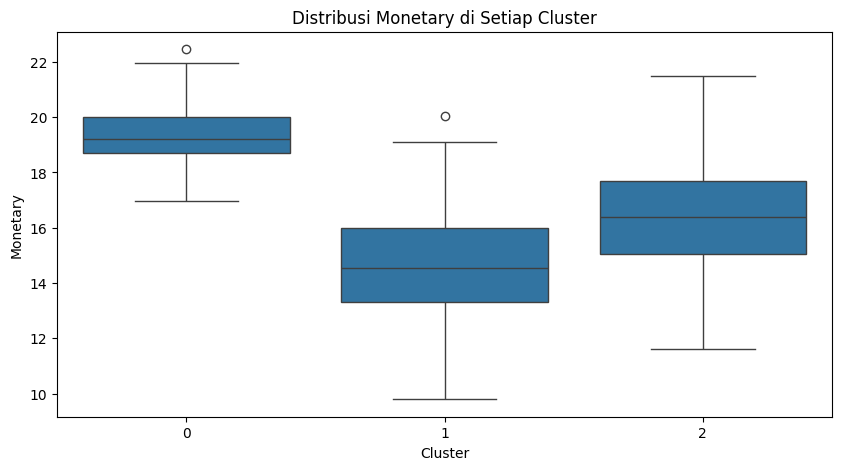

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x="Cluster", y="Monetary", data=rfm)
plt.title("Distribusi Monetary di Setiap Cluster")
plt.show()

- Cluster 0	: 38 hari (recent)	Sering belanja (2.78 kali)	Pengeluaran tinggi (19.36 juta)	Loyal customers → Pelanggan yang aktif dan sering belanja dalam jumlah besar
- Cluster 1 :	266 hari (sangat lama)	Jarang belanja (0.75 kali)	Pengeluaran rendah (14.7 juta)	Lost customers → Pelanggan yang jarang belanja, kemungkinan tidak kembali
- Cluster 2 :	88 hari (menengah)	Kadang belanja (0.93 kali)	Pengeluaran sedang (16.32 juta)	Potential customers → Bisa ditingkatkan loyalitasnya dengan strategi pemasaran


In [ ]:
import numpy as np

# Mengembalikan Frequency ke skala aslinya
rfm["Frequency"] = np.exp(rfm["Frequency"])

# Cek hasil setelah dikembalikan ke skala aslinya
rfm.groupby("Cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": "mean"
})


,Recency,Frequency,Monetary
Cluster,,,
0,38.543478,21.195652,19.364591
1,266.291667,2.178030,14.700711
2,88.759717,2.742049,16.328532


1.  Cluster 0 → Pelanggan Loyal & High-Value
- Sering bertransaksi (21x rata-rata)
- Belanja besar (19.36 juta)
- Perlu dijaga loyalitasnya.

2. Cluster 1 → Pelanggan Pasif (Hampir Hilang)
- Jarang belanja (2x transaksi)
- Sudah lama tidak belanja (266 hari sejak transaksi terakhir)
- Butuh strategi re-engagement (misalnya email promo, cashback, atau penawaran menarik).

3. Cluster 2 → Pelanggan Baru atau Potensial
- Transaksi cukup sering (2-3x)
- Bisa diarahkan menjadi pelanggan loyal dengan program upselling (misalnya promo paket bundling).


In [ ]:
rfm['Cluster'].value_counts()


,count
Cluster,
2,283
1,264
0,46


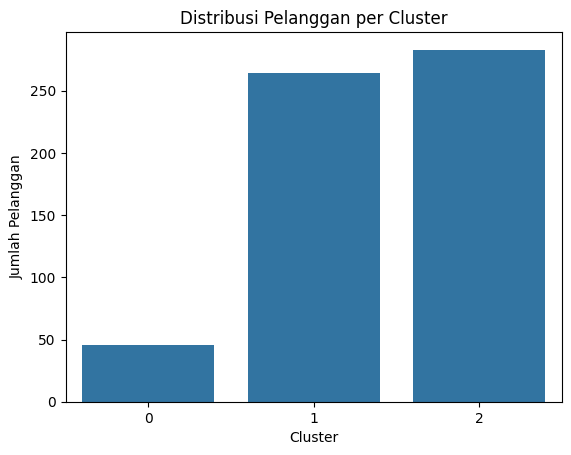

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=rfm["Cluster"])
plt.title("Distribusi Pelanggan per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Pelanggan")
plt.show()

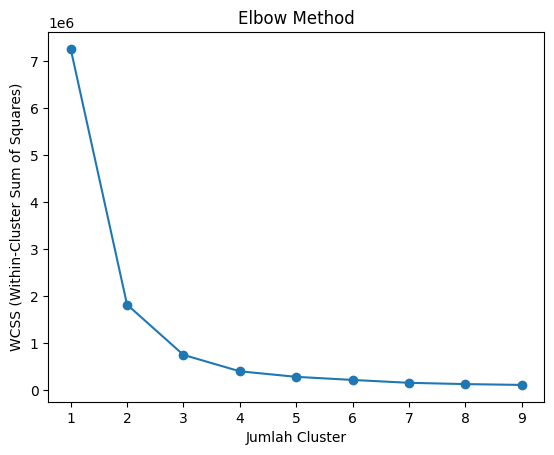

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Mencoba beberapa jumlah cluster
wcss = []
for i in range(1, 10):  # Coba dari 1 sampai 10 cluster
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score
score = silhouette_score(rfm, rfm['Cluster'])
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.2175


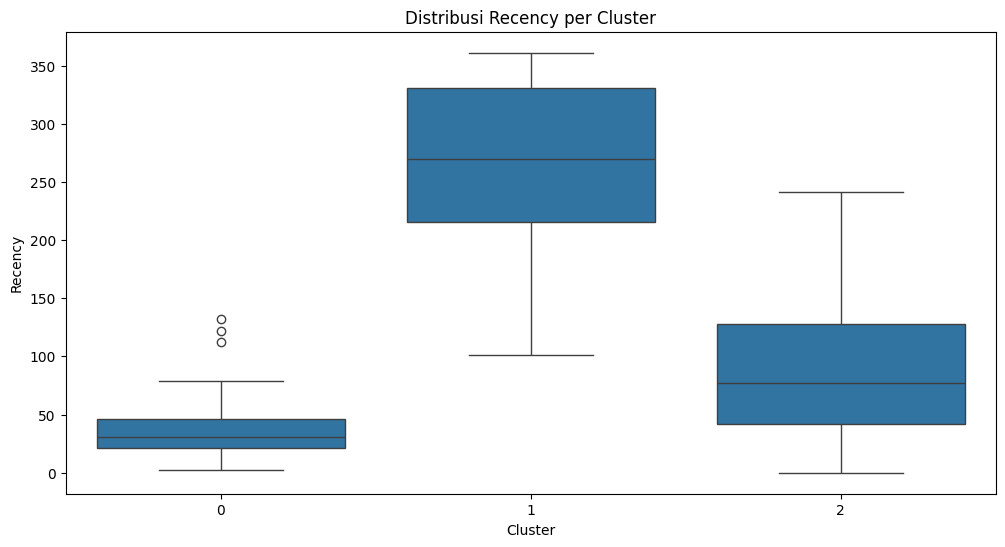

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x=rfm['Cluster'], y=rfm['Recency'])
plt.title("Distribusi Recency per Cluster")
plt.show()


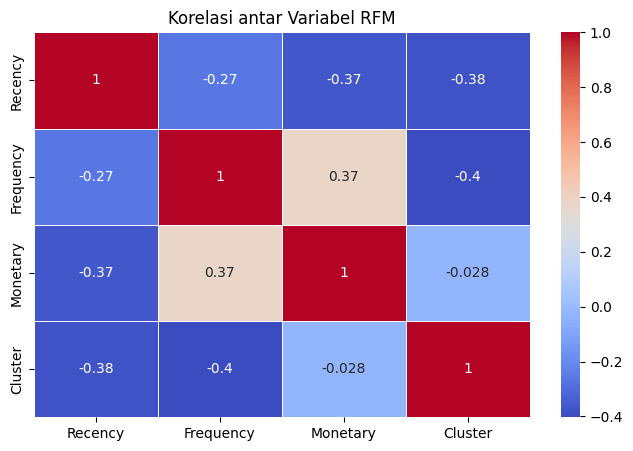

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasi antar Variabel RFM")
plt.show()


In [ ]:
rfm.to_csv('hasil_cluster_rfm.csv', index=True)  # Simpan dengan nama pelanggan sebagai index


In [ ]:
# Pastikan ada kolom tanggal transaksi
rfm['Last_Purchase_Date'] = df.groupby('NAMACUSTOMER')['TGL'].max()


In [ ]:
final_rfm = rfm[['Recency', 'Frequency', 'Monetary', 'Cluster', 'Last_Purchase_Date']]
print(final_rfm.head())


                                        Recency  Frequency   Monetary  \
NAMACUSTOMER                                                            
ACHMAD SAID                                  51        8.0  18.299780   
ADI UPAYA/POLTEKKES TNI AU ADISUTJIPTO       95        2.0  18.351823   
ALFA LINK                                   220        3.0  16.326120   
ANIK MEBEL                                  122        6.0  19.262537   
ANTONIUS JEKSON                              76        7.0  14.124386   

                                        Cluster Last_Purchase_Date  
NAMACUSTOMER                                                        
ACHMAD SAID                                   0         2023-11-08  
ADI UPAYA/POLTEKKES TNI AU ADISUTJIPTO        2         2023-09-25  
ALFA LINK                                     1         2023-05-23  
ANIK MEBEL                                    0         2023-08-29  
ANTONIUS JEKSON                               2         2023-10-14  


In [ ]:
final_rfm.to_csv('hasil_cluster_rfm.csv', index=True)


#### Analisis produk yang sering dibeli

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("dataset_rfm_mentah.csv")  # Ganti dengan nama file CSV Anda

# Periksa apakah ada kolom 'QTY' atau bukan
if 'QTY ' in df.columns:
    df.rename(columns={'QTY ': 'QTY'}, inplace=True)  # Menghapus spasi ekstra jika ada

# Hitung jumlah pembelian per produk
produk_terlaris = df.groupby("NAMABARANG")["QTY"].sum().reset_index()

# Urutkan dari yang paling banyak dibeli
produk_terlaris = produk_terlaris.sort_values(by="QTY", ascending=False)

# Tampilkan produk terlaris dengan tampilan rapi
print(produk_terlaris.head(10).to_string(index=False))


        NAMABARANG      QTY
  CAESAR N BIRU L1 5776.000
 CAESAR N MERAH N3 4238.000
  YAMATO MND HITAM 4119.000
  YAMATO HAA MERAH 2656.000
  YAMATO MBD HITAM 2126.465
  AYUMI CHAIR NO.6 1923.000
  YAMATO HAA HITAM 1787.000
   AYUMI DESK NO.6 1735.000
 CAESAR N HIJAU L6 1536.000
CAESAR N COKLAT N4 1247.000


#### **Interpretasi Data:**
1. Produk-produk dengan nama "CAESAR" dan "YAMATO" mendominasi daftar, yang mengindikasikan bahwa produk-produk ini memiliki permintaan tinggi.

2. Produk kategori kursi dan meja seperti Ayumi Chair No.6 dan Ayumi Desk No.6 juga cukup tinggi permintaannya.


### *Strategi Pemasaran Berdasarkan Data*
Berdasarkan pola pembelian ini, strategi pemasaran yang dapat diterapkan:

#### **Strategi Promosi untuk Produk Terlaris**

- Gunakan strategi retensi pelanggan dengan memberikan diskon atau loyalty program kepada pelanggan yang sering membeli produk ini.

- Terapkan bundle pricing (misalnya, pembelian meja Ayumi mendapatkan diskon untuk kursi Ayumi).

- Iklan digital yang berfokus pada produk-produk best-seller ini melalui Google Ads dan Facebook Ads.

#### **Optimalisasi Stok dan Distribusi**

- Pastikan produk dengan permintaan tinggi selalu tersedia agar tidak kehilangan pelanggan.

- Analisis rantai pasokan untuk mengoptimalkan distribusi produk unggulan ini ke wilayah dengan permintaan tertinggi.

#### **Strategi Upselling dan Cross-Selling**

- Menawarkan produk tambahan atau premium ketika pelanggan membeli produk terlaris.

- Contoh: Jika pelanggan membeli kursi Ayumi Chair No.6, tawarkan meja Ayumi Desk No.6 sebagai paket hemat.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Konversi data transaksi menjadi format basket (One-Hot Encoding)
basket = df.groupby(["NOFAKTUR", "NAMABARANG"])["QTY"].sum().unstack().fillna(0)

# Ubah data menjadi binary (1 jika ada pembelian, 0 jika tidak)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Gunakan Apriori untuk menemukan pola
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Aturan asosiasi berdasarkan confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Tampilkan aturan asosiasi
print(rules[["antecedents", "consequents", "support", "confidence", "lift"]])


<ipython-input-59-1328551be4a5>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
